In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [3]:
X.shape

(100, 2)

<Axes: >

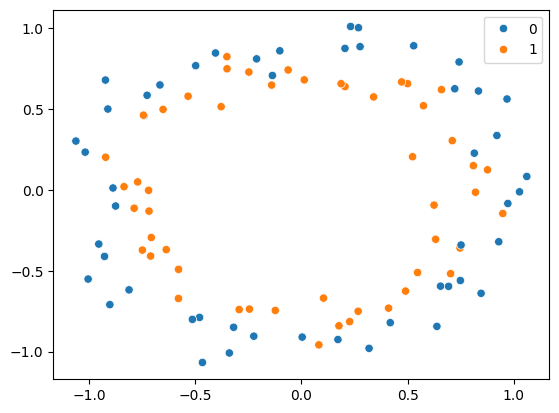

In [4]:
sns.scatterplot(x= X[:,0],y= X[:,1],hue=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks= callback)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9234 - loss: 0.2109 - val_accuracy: 0.6500 - val_loss: 0.6678
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9312 - loss: 0.1981 - val_accuracy: 0.6500 - val_loss: 0.6677
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9414 - loss: 0.1949 - val_accuracy: 0.6500 - val_loss: 0.6701
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9297 - loss: 0.2265 - val_accuracy: 0.6500 - val_loss: 0.6713
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9414 - loss: 0.2022 - val_accuracy: 0.6500 - val_loss: 0.6723
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9156 - loss: 0.2300 - val_accuracy: 0.6500 - val_loss: 0.6668
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9273 - loss: 0.2207 - val_accuracy: 0.6500 - val_loss: 0.6657
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9375 - loss: 0.2165 - val_accuracy: 0.6500 - val_loss:

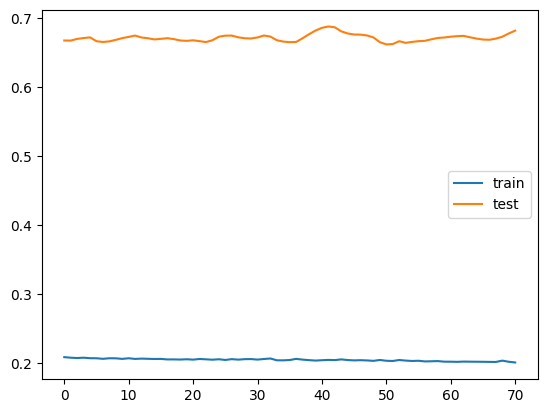

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


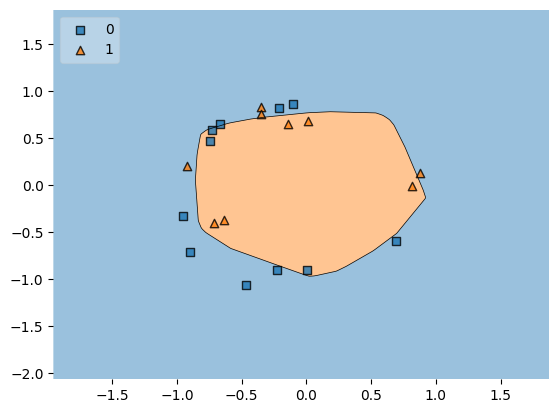

In [19]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()